In [55]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

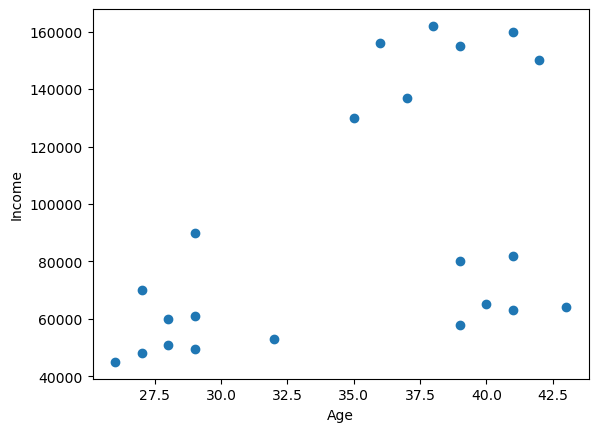

In [6]:
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")


In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
df["clusters"] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'INCOME')

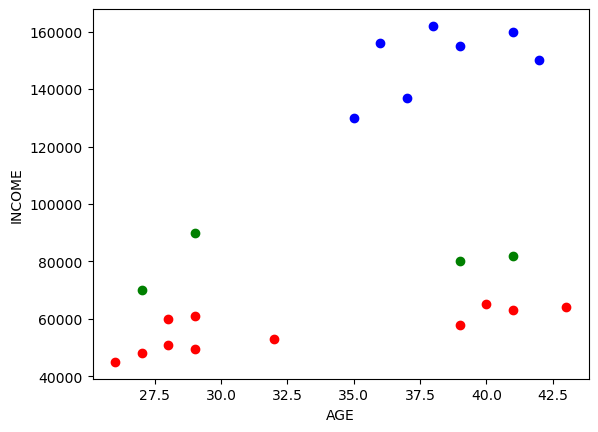

In [11]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]
plt.scatter(df0["Age"],df0["Income($)"], color = "red")
plt.scatter(df1["Age"],df1["Income($)"], color = "blue")
plt.scatter(df2["Age"],df2["Income($)"], color = "green")
plt.xlabel("AGE")
plt.ylabel("INCOME")


In [15]:
scaler =MinMaxScaler()

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])
                     

In [16]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [23]:
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [27]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [28]:
df["clusters"] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


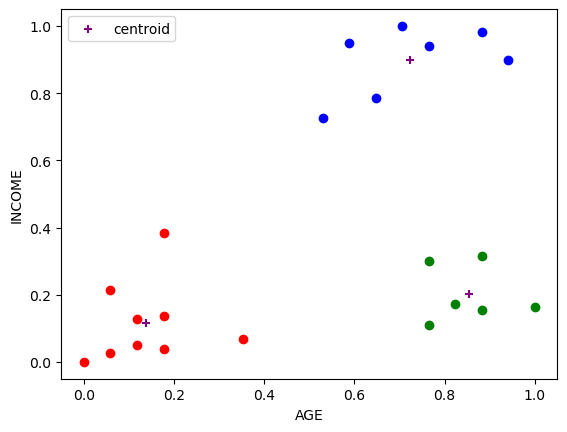

In [41]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]
plt.scatter(df0["Age"],df0["Income($)"], color = "red")
plt.scatter(df1["Age"],df1["Income($)"], color = "blue")
plt.scatter(df2["Age"],df2["Income($)"], color = "green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple', marker = '+', label = "centroid")
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.legend()

In [37]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [59]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [61]:
sse = []                     
k_rng = range(1, 10)          
for k in k_rng:
    km = KMeans(n_clusters=k)        
    km.fit(df[["Age", "Income($)"]]) 
    sse.append(km.inertia_)          


C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklea

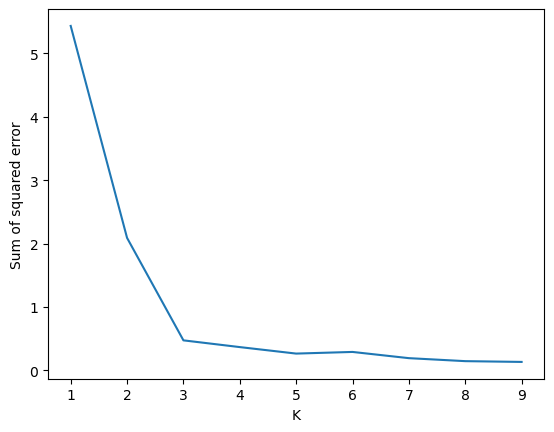

In [62]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [63]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.26640301246684156,
 0.29239728905045015,
 0.1942925640689815,
 0.14716643104023697,
 0.13492217186986954]